<a href="https://colab.research.google.com/github/MatLock/UdeSa-Applied-Math-and-Optimization/blob/main/clase_03.clase_03_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Probemos buscar el mínimo de la función

$$ f(x, y) = \frac{1}{2} (a x^2 + b y^2) $$

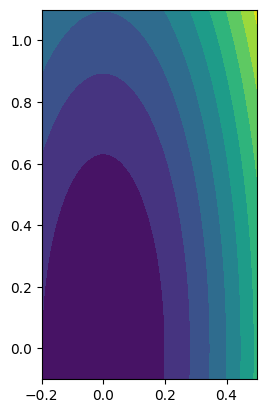

In [ ]:
from pylab import *
import copy

def test_fn(r, a, b):
  return 0.5*(a*r[0]**2 + b*r[1]**2)

def grad(r, a, b):
  return [a*r[0], b*r[1]]

aa = 1.0
bb = 0.1
xx = np.linspace(-2*bb, 0.5, num=100)
yy = np.linspace(-bb, 1 + bb, num=200)
X, Y = np.meshgrid(xx, yy, indexing='ij')
rr = np.array([[(x, y) for x in xx] for y in yy])
contourf(X, Y, test_fn([X, Y], aa, bb), levels=10)
gca().set_aspect('equal')

Realizamos el proceso iterativo

$$ \mathbf{x}_{k+1} = \mathbf{x}_k - s \nabla f (\mathbf{x}_k) $$

In [ ]:
Nsteps = 30
step = 2.0/(1+bb)  # Elegido con el criterio de exact line search
xk = np.zeros(Nsteps+1)
yk = np.zeros(Nsteps+1)
fk = np.zeros(Nsteps+1)

xk[0] = bb
yk[0] = 1.0
fk[0] = test_fn((bb, 1.0), aa, bb)

for ii in range(Nsteps):
  xk[ii+1] = xk[ii] - step*grad((xk[ii], yk[ii]), aa, bb)[0]
  yk[ii+1] = yk[ii] - step*grad((xk[ii], yk[ii]), aa, bb)[1]
  fk[ii+1] = test_fn((xk[ii+1], yk[ii+1]), aa, bb)

x_gd = copy.copy(xk)
y_gd = copy.copy(yk)

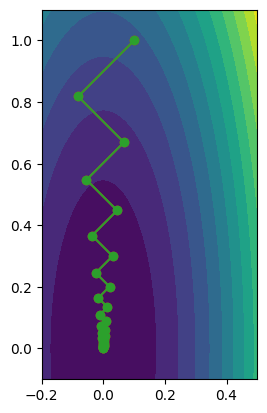

In [ ]:
contourf(X, Y, test_fn([X, Y], aa, bb), levels=15)
plot(xk, yk, color='C3', marker='o')
plot(x_gd, y_gd, color='C2', marker='o')
gca().set_aspect('equal')

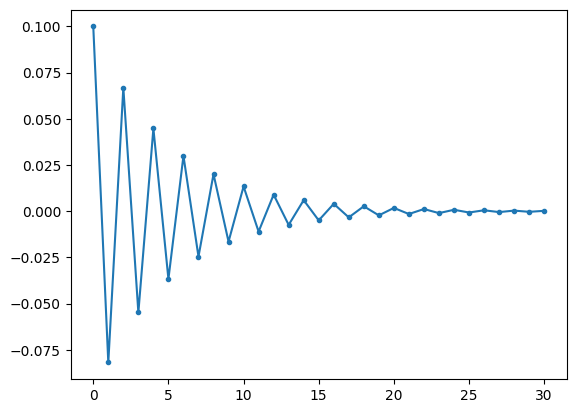

In [ ]:
plot(xk, marker='.')

## Variante con momentum

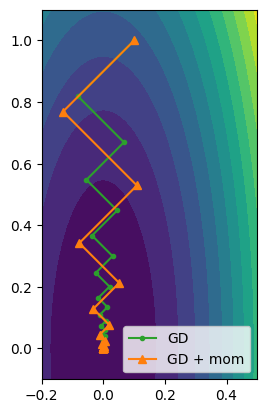

In [ ]:
Nsteps = 30
step = (2.0/(1+np.sqrt(bb)))**2
beta = ((1-np.sqrt(bb))/(1+np.sqrt(bb)))**2
xk = np.zeros(Nsteps+1)
wk = np.zeros(Nsteps+1)
yk = np.zeros(Nsteps+1)
zk = np.zeros(Nsteps+1)
fk = np.zeros(Nsteps+1)

xk[0] = bb
yk[0] = 1.0

wk[0] = grad((xk[0], yk[0]), aa, bb)[0]
zk[0] = grad((xk[0], yk[0]), aa, bb)[1]

fk[0] = test_fn((bb, 1.0), aa, bb)

for ii in range(Nsteps):
  xk[ii+1] = xk[ii] - step*wk[ii]
  yk[ii+1] = yk[ii] - step*zk[ii]

  wk[ii+1] = grad((xk[ii+1], yk[ii+1]), aa, bb)[0] + beta*wk[ii]
  zk[ii+1] = grad((xk[ii+1], yk[ii+1]), aa, bb)[1] + beta*zk[ii]

  fk[ii+1] = test_fn((xk[ii+1], yk[ii+1]), aa, bb)

x_mom = copy.copy(xk)
y_mom = copy.copy(yk)
contourf(X, Y, test_fn([X, Y], aa, bb), levels=15)
plot(x_gd, y_gd, color='C2', marker='.', label='GD')
plot(x_mom, y_mom, color='C1', marker='^', label='GD + mom')
legend()
gca().set_aspect('equal')

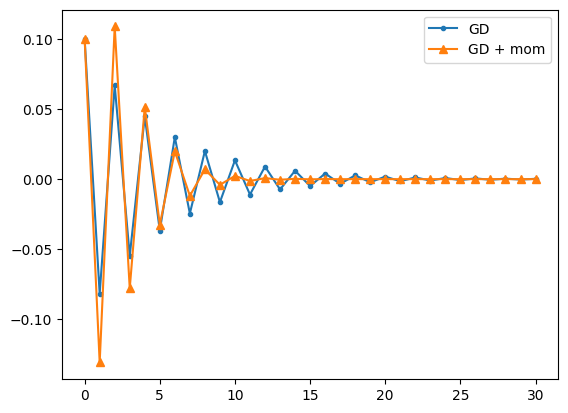

In [ ]:
plot(x_gd, color='C0', marker='.', label='GD')
plot(x_mom, color='C1', marker='^', label='GD + mom')
legend()

## Un mejor ejemplo de SGD

(100, 2)


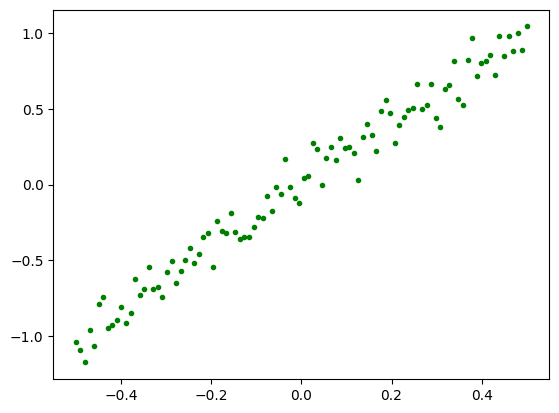

In [ ]:
# Generación de datos
N = 100
data = [(x, 2*x+ np.random.normal(0.0, 0.1) + 1.0) for x in linspace(7,8,num=N)]
data = np.array(data)
#plot(data[:, 0], data[:, 1], 'b.')
data = data - data.mean(axis=0)
plot(data[:, 0], data[:, 1], 'g.')
print(shape(data))

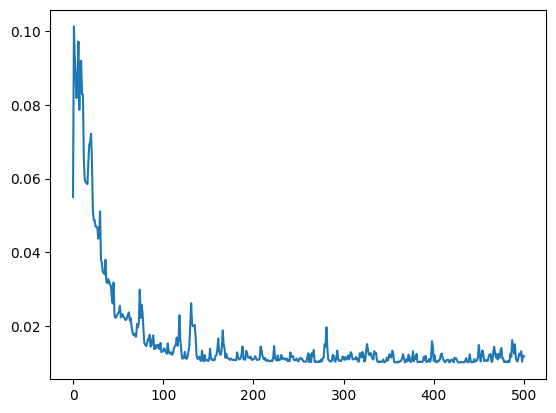

In [ ]:
def lineal(x, a, b):
  return a*x + b

def error(yi, x, a, b):
  return (yi - lineal(x,a,b))**2

def grad(yi, x, a, b):
  fact = 2*(yi - lineal(x,a,b))
  da = -x
  db = -1.0
  return [fact*da, fact*db]


Nsteps = 500
step = 0.1
ak = np.zeros(Nsteps+1)
bk = np.zeros(Nsteps+1)
fk = np.zeros(Nsteps+1)

ak[0] = 1.0
bk[0] = 0.0
fk[0] = test_fn((bb, 1.0), aa, bb)

for ii in range(Nsteps):
  idx   = np.random.choice(N)
  point = data[idx]
  geval    = grad(point[1], point[0], ak[ii], bk[ii])
  ak[ii+1] = ak[ii] - step*geval[0]
  bk[ii+1] = bk[ii] - step*geval[1]
  fk[ii+1] = np.mean(error(data[:, 1], data[:, 0], ak[ii+1], bk[ii+1]))

plot(fk)

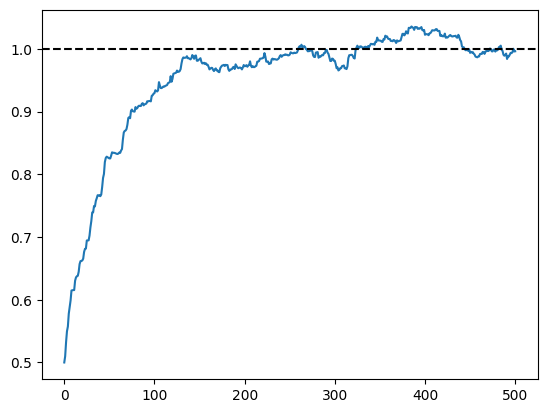

In [ ]:
plot(ak/2.0)
axhline(1.0, color='k', ls='--')

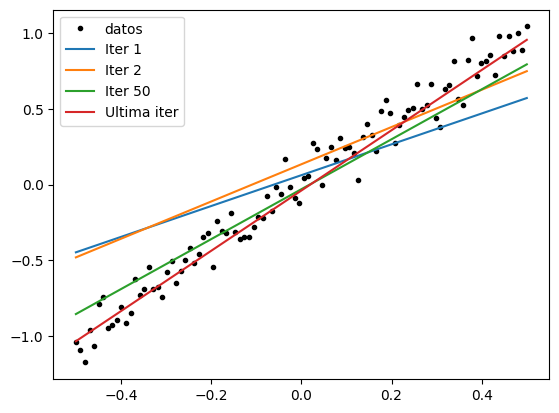

In [ ]:
plot(data[:, 0], data[:, 1], 'k.', label='datos')
plot(data[:, 0], lineal(data[:, 0], ak[1], bk[1]), label='Iter 1')
plot(data[:, 0], lineal(data[:, 0], ak[10], bk[10]), label='Iter 2')
plot(data[:, 0], lineal(data[:, 0], ak[50], bk[50]), label='Iter 50')
plot(data[:, 0], lineal(data[:, 0], ak[-1], bk[-1]), label='Ultima iter')
legend()

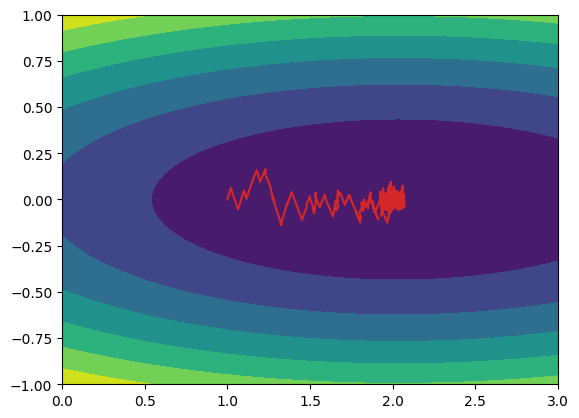

In [ ]:
asp = linspace(0, 3)
bsp = linspace(-1, 1)
errs = np.array([[np.mean(error(data[:, 1], data[:, 0], aa, bb)) for aa in asp] for bb in bsp])
contourf(asp, bsp, errs)
plot(ak, bk, color='C3')

Newton for $$ f(x, y) = \frac{1}{2} (a x^2 + b y^2) $$

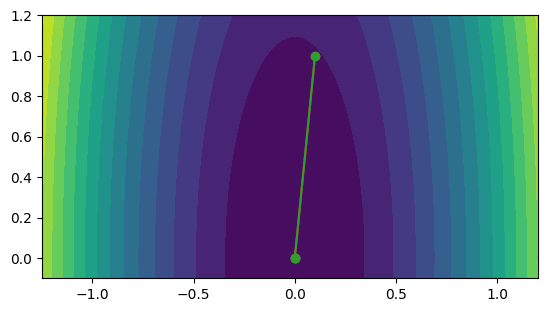

In [ ]:
from pylab import *
import copy

def f(r, a, b):
  return 0.5*(a*r[0]**2 + b*r[1]**2)

def grad_f(r, a, b):
  return np.array([a*r[0], b*r[1]])

def hessian(r, a, b):
  elem_1_1 = a
  elem_1_2 = 0
  elem_2_1 = 0
  elem_2_2 = b
  return np.array([[elem_1_1, elem_1_2], [elem_2_1, elem_2_2]])

def newton_backtracking(point, a, b, gradient_value, p_k, alpha_init, beta = 0.5,c = 0.25):
  f_x = f(point, a, b)
  tmp = alpha_init

  while f(point + tmp * p_k, a, b) > f(point,a, b) + tmp * c * gradient_value.T @ p_k:
    tmp = beta * tmp
  return tmp



Nsteps = 2
step = 1  # alpha
xk = np.zeros(Nsteps+1)
yk = np.zeros(Nsteps+1)
fk = np.zeros(Nsteps+1)
aa = 1.0
bb = 0.1
xk[0] = 0.1
yk[0] = 1.0
fk[0] = f((0.1, 1.0), aa, bb)

for ii in range(Nsteps):
  point = np.array([xk[ii], yk[ii]])
  f_gradient = grad_f(point, aa, bb)
  f_hessian = hessian(point, aa, bb)
  p_k = - np.linalg.solve(f_hessian, f_gradient)
  step = newton_backtracking(point, aa, bb,f_gradient, p_k, step)
  xk[ii+1] = xk[ii] + step*p_k[0]
  yk[ii+1] = yk[ii] + step*p_k[1]
  fk[ii+1] = f((xk[ii+1], yk[ii+1]), aa, bb)

x_gd = copy.copy(xk)
y_gd = copy.copy(yk)

xx = np.linspace(-1.25, 1.2, num=100)
yy = np.linspace(-0.1, 1.2, num=200)
X, Y = np.meshgrid(xx, yy, indexing='ij')

contourf(X, Y, f([X, Y], aa, bb), levels=15)
plot(xk, yk, color='C3', marker='o')
plot(x_gd, y_gd, color='C2', marker='o')
gca().set_aspect('equal')

##back tracking + line direct search for

$$ f(x, y) = 100(y + x^2)^2 + (1 - x)^2 $$

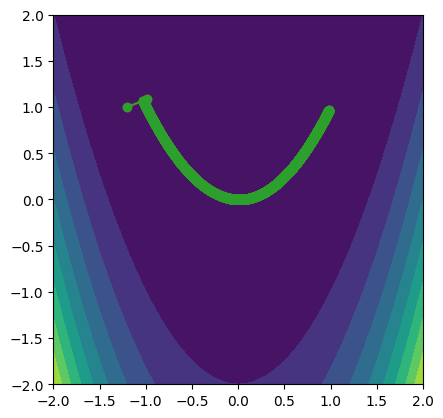

In [ ]:
import numpy as np
import copy
from pylab import *


def rosenbrock(point):
  x = point[0]
  y = point[1]
  return 100 * (y-x**2)**2 + (1 - x)**2

def gradient(point):
  x = point[0]
  y = point[1]
  df_dx = -400 * x * (y - x**2) - 2 * (1 - x)
  df_dy = 200 * (y - x**2)
  return np.array([df_dx, df_dy])


def backtracking_linear_search(point, alpha_init, beta= 0.5, c = 0.1):
  tmp = alpha_init
  gradient_value = gradient(point)

  while rosenbrock(point - tmp * gradient_value) > rosenbrock(point) - tmp * c * np.linalg.norm(gradient_value)**2:
    tmp = beta * tmp
  return tmp


Nsteps = 8000
step = 1.0 #alpha
xk = np.zeros(Nsteps+1)
yk = np.zeros(Nsteps+1)
fk = np.zeros(Nsteps+1)

xk[0] = -1.2
yk[0] = 1
fk[0] = rosenbrock(np.array([-1.2, 1]))

#minimo 1,1
for ii in range(Nsteps):
  step = backtracking_linear_search([xk[ii], yk[ii]], step)
  xk[ii+1] = xk[ii] - step*gradient([xk[ii], yk[ii]])[0]
  yk[ii+1] = yk[ii] - step*gradient([xk[ii], yk[ii]])[1]
  fk[ii+1] = rosenbrock([xk[ii+1], yk[ii+1]])

xx = np.linspace(-2, 2, num=100)
yy = np.linspace(-2, 2, num=200)
X, Y = np.meshgrid(xx, yy, indexing='ij')
contourf(X, Y, rosenbrock([X, Y]), levels=10)
plot(xk, yk, color='C3', marker='o')
plot(xk, yk, color='C2', marker='o')
gca().set_aspect('equal')

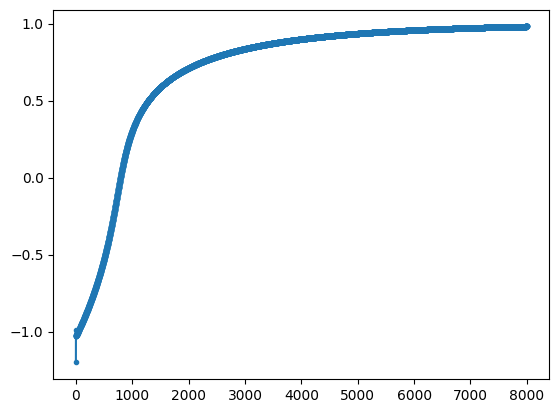

In [ ]:
plot(xk, marker='.')

newton for rosenbrock

0.9921050573725116
0.9841037078982453


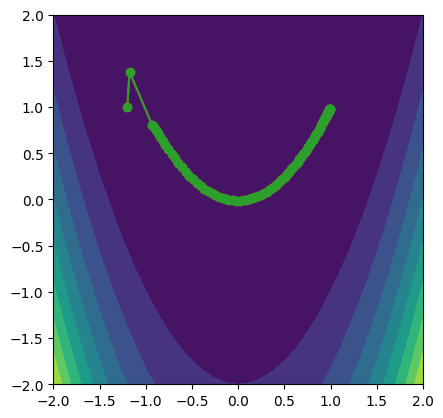

In [ ]:
import numpy as np
import copy
from pylab import *


def rosenbrock(point):
  x = point[0]
  y = point[1]
  return 100 * (y-x**2)**2 + (1 - x)**2

def gradient(point):
  x = point[0]
  y = point[1]
  df_dx = -400 * x * (y - x**2) - 2 * (1 - x)
  df_dy = 200 * (y - x**2)
  return np.array([df_dx, df_dy])

def hessian(point):
  x = point[0]
  y = point[1]
  elem_1_1 = 1200 * x**2 - 400 * y + 2
  elem_1_2 = -400 * x
  elem_2_1 = -400 * x
  elem_2_2 = 200
  return np.array([[elem_1_1, elem_1_2], [elem_2_1, elem_2_2]])

def backtracking_newton(point, gradient_value, p_k, alpha_init=1.0, beta= 0.5, c = 0.25):
  tmp = alpha_init

  while rosenbrock(point + tmp * p_k) > rosenbrock(point) + c * tmp * gradient_value.T @ p_k:
    tmp = beta * tmp
  return tmp


Nsteps = 90
step = 1 #alpha
xk = np.zeros(Nsteps+1)
yk = np.zeros(Nsteps+1)
fk = np.zeros(Nsteps+1)

xk[0] = -1.2
yk[0] = 1
fk[0] = rosenbrock(np.array([-1.2, 1]))

#minimo 1,1
# si reinicio el step (no paso el tamaño del step calculado en el paso anterior)
# llega a la solucion en 22 iteraciones
for ii in range(Nsteps):
  point = np.array([xk[ii], yk[ii]]);
  gradient_value = gradient(point)
  hessian_value = hessian(point)
  p_k = np.linalg.solve(hessian_value, - gradient_value)
  step = backtracking_newton(point, gradient_value, p_k, step)
  xk[ii+1] = xk[ii] + step*p_k[0]
  yk[ii+1] = yk[ii] + step*p_k[1]

xx = np.linspace(-2, 2, num=100)
yy = np.linspace(-2, 2, num=200)
X, Y = np.meshgrid(xx, yy, indexing='ij')
contourf(X, Y, rosenbrock([X, Y]), levels=10)
plot(xk, yk, color='C3', marker='o')
plot(xk, yk, color='C2', marker='o')
gca().set_aspect('equal')
print(xk[-1])
print(yk[-1])

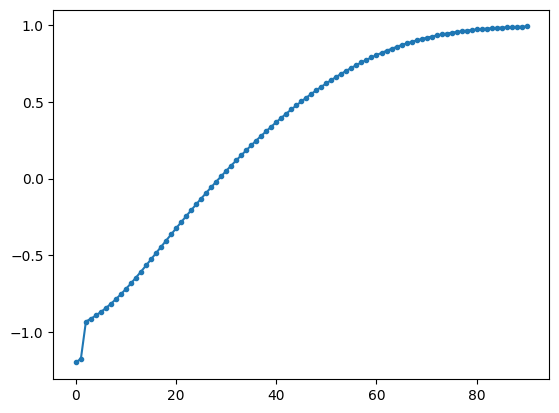

In [ ]:
plot(xk, marker='.')

[  8.39547289  -3.22819129  -5.07043937  11.7357886  -13.97366327
  -1.98803568 -20.24559904  -3.67473698  10.45759172 -12.89625707
 -16.05549942  27.36334614  18.38997982  -5.04367967  -1.29724381
   4.65940086   2.58572467   1.22970093  -3.74163977  -4.79793017
   1.90350209  -6.14109724   4.30547938   4.20634523 -18.72719462
  10.66143015 -19.88168914  -1.86299367  -3.74944023   3.01498212
 -32.09617757   4.03440783  10.80883176  16.25124146 -21.0436851
  23.39778219 -11.58255914   1.37846183   0.52579954  -3.44591842
  -6.9491304   -2.79153502  -0.51722764  19.61223178   2.89622548
 -20.025921    -7.79069591  16.96888885   5.11371466  -8.93257934
  -9.33168203   5.816619   -28.95902599  22.94914881  -2.03118138
  -3.25259867  -1.07144189  31.34373006  -4.66974799   7.10857982
   0.8886306    9.00495521  35.86794064  -5.49249381   1.84033168
  -4.4577576   14.02289655  -4.88907199 -21.2544393    4.03918697
  10.76748254   9.80779471 -12.34172788  14.44245382   3.00476161
 -25.253021

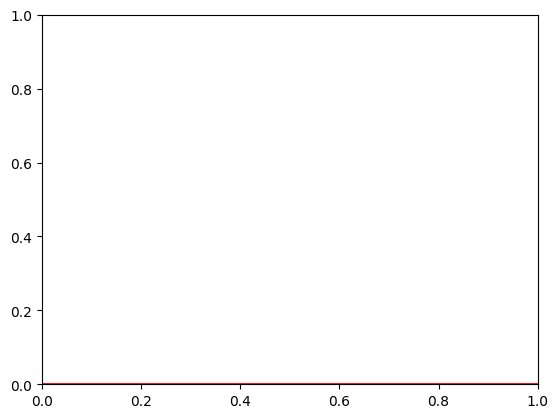

In [11]:
import numpy as np

np.random.seed(0)
A = np.random.randn(100, 100)
b = np.random.randn(100)


# Inicialización
x = np.zeros(100)
max_iter = 1000

#metodo pseudo inversa (A = UEV^t)
#U matriz ortogonal de auto vectores de A A^t
#Vt matriz diagonal de valores singulares
#S matriz ortogonal de acutovectores de A^t A
U,S,Vt = np.linalg.svd(A)

#U+. U es ortogonal, su inversa es igual a su traspuesta U.t = U+
U_plus = U.T
#S matriz de valores singulares. Para convertir en E
# E = np.diag(S)
#para convertir en E+
E_plus = np.diag(1/S)
#w* = E+ U+ y
w = (Vt.T @ E_plus @ U.T)
x_star = w @ b
#matriz que minimiza la ecuacion utilizando el metodo de la pseudo-inversa
print(x_star)

#utilizando las funciones anteriores da el mismo resultado (funciones en el
# ejercicio de minimos cuadrados)

#vector = np.linalg.inv(A.T @ A) @ A.T @ b
#print(vector)
#vector2 = np.linalg.solve(A.T @ A, A.T @ b)
#print(vector2)



def fx(xdk):
  return 0.5 * np.linalg.norm(A @ xdk - b)**2


plt.axhline(fx(x_star), color='C3')
#plt.plot(fx(x_star))

[-0.26675803 -0.33571998  0.38627395  0.3901959  -0.11618404 -0.00160569
  0.00585747  0.65960283 -0.00170326 -0.73434647 -0.3662382   0.37367432
  0.17822516  0.45884119 -0.28804002  1.14003714 -1.12287187 -0.26474529
 -0.97659839 -0.15409973  0.72068299 -0.39483522  0.07785415 -0.31619487
 -0.3161308  -0.36671741 -0.67407641  0.52252273  0.04785787  0.38205246
  0.28115371 -0.06862765  0.40263563 -0.09735966  0.21668528  0.0054066
  0.01798778 -0.27995875  0.84996321 -0.26438962 -0.25479928  0.41048556
 -0.2168098   0.59882138 -0.29598011 -0.06221682 -1.22319577 -0.07961372
  0.19367228  0.46122843 -0.18748535 -0.44494388  0.58000525  0.16615991
  0.10376279  0.10559672 -0.16728203 -0.0124426  -0.53155817  0.77817855
  0.02550252 -0.05782337  0.21002113 -0.0779882  -0.52115194  0.34805034
  0.15749322  0.42685571  0.63193431  0.78885532 -0.65254061 -0.46379481
  0.27814038  0.28828046  0.11809472 -0.347586    0.25860879  0.53708584
  0.1977841  -0.24404764 -0.32712797 -0.1425946   0.

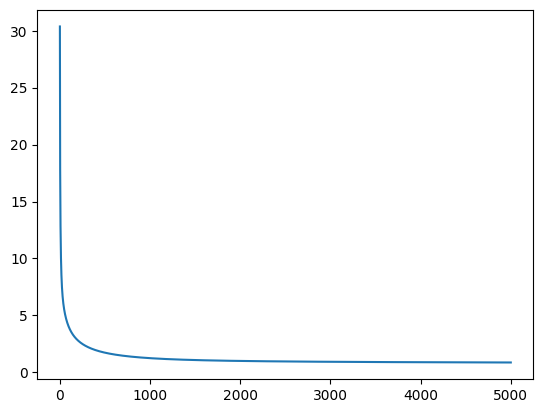

In [12]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
#matriz 100x100
A = np.random.randn(100, 100)
#vector de resultados
b = np.random.randn(100)


x = np.zeros(100)

# matriz hessiana para una matriz
H = A.T @ A
eigenvalues = np.linalg.eigvalsh(H)
M = np.max(eigenvalues)
alpha = 1 / M # step
xs = []


def fx(xdk):
  return 0.5 * np.linalg.norm(A @ xdk - b)**2

def gradient(xdk):
  return A.T @ (A @ xdk - b)

for i in range(5000):
  xdk = alpha*gradient(x)
  x = x - xdk
  xs.append(fx(x))

print(x)
plt.plot(xs)
